In [5]:
import pandas as pd
import random
L = []
for i in range(1000) : 
    a = random.randint(1 , 6)
    b = random.randint(1 , 6)
    L.append(a + b)
print(len(L))

1000


In [6]:
L[:5]
s = (pd.Series(L).value_counts() /pd.Series(L).value_counts().sum()).sort_index()
print(s)

2     0.036
3     0.061
4     0.096
5     0.105
6     0.137
7     0.167
8     0.121
9     0.092
10    0.085
11    0.066
12    0.034
Name: count, dtype: float64


<Axes: >

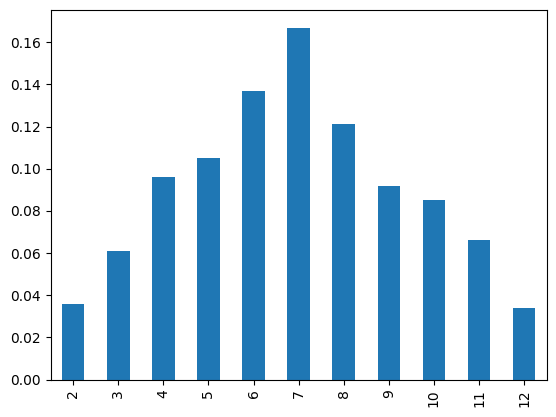

In [7]:
s.plot(kind = 'bar')

In [8]:
import numpy as np
np.cumsum(s)

2     0.036
3     0.097
4     0.193
5     0.298
6     0.435
7     0.602
8     0.723
9     0.815
10    0.900
11    0.966
12    1.000
Name: count, dtype: float64

<Axes: >

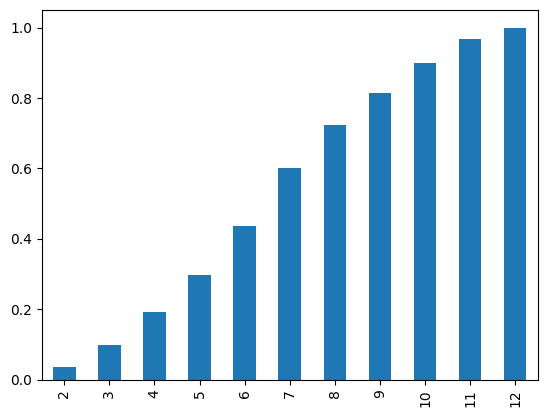

In [9]:
np.cumsum(s).plot(kind='bar')

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal

sample = normal(loc = 50 , scale = 5 , size = 1000)

In [11]:
sample.mean()

np.float64(49.69129458638274)

(array([  9.,  35., 107., 230., 230., 216., 125.,  40.,   7.,   1.]),
 array([34.7007599 , 38.00049814, 41.30023638, 44.59997462, 47.89971286,
        51.1994511 , 54.49918934, 57.79892758, 61.09866583, 64.39840407,
        67.69814231]),
 <BarContainer object of 10 artists>)

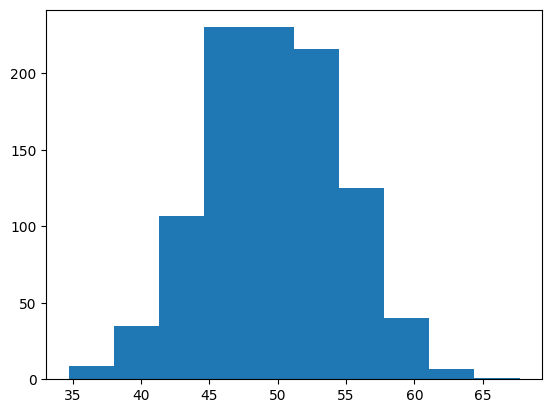

In [12]:
#plot histogram to understand the distribution of data
plt.hist(sample , bins = 10)


In [13]:
#calculate the sample mean and sample std dev
sample_mean = sample.mean()
sample_std = sample.std()

In [14]:
#fit the distribution with the above parameters

from scipy.stats import norm
dist = norm(sample_mean , sample_std)

In [15]:
values = np.linspace(sample.min() , sample.max() , 100)

In [16]:
probability_density = [dist.pdf(value) for value in values]

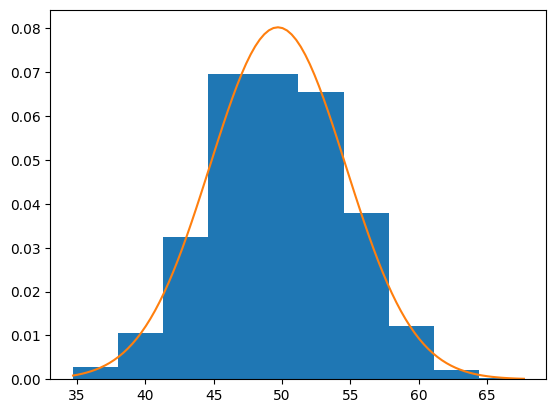

In [17]:
#plot the hostogram and pdf
plt.hist(sample, bins = 10 , density = True)
plt.plot(values , probability_density)

C:\Users\User MNT\AppData\Local\Temp\ipykernel_3360\1299814948.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample)


<Axes: ylabel='Density'>

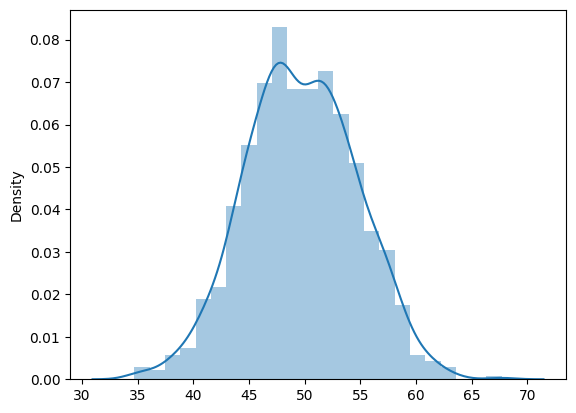

In [18]:
#another way(using seaborn)
import seaborn as sns
sns.distplot(sample)

(array([ 2.,  0.,  1.,  1.,  1.,  3.,  4.,  4.,  9.,  9., 15., 13., 19.,
        21., 24., 28., 23., 18., 22., 14., 17., 18., 11.,  9.,  8., 19.,
         6., 19., 18., 24., 32., 39., 37., 49., 66., 52., 57., 43., 40.,
        41., 33., 28., 24., 26., 21., 16.,  4.,  9.,  1.,  2.]),
 array([ 4.32853337,  5.31694151,  6.30534964,  7.29375777,  8.28216591,
         9.27057404, 10.25898217, 11.24739031, 12.23579844, 13.22420657,
        14.21261471, 15.20102284, 16.18943097, 17.17783911, 18.16624724,
        19.15465538, 20.14306351, 21.13147164, 22.11987978, 23.10828791,
        24.09669604, 25.08510418, 26.07351231, 27.06192044, 28.05032858,
        29.03873671, 30.02714485, 31.01555298, 32.00396111, 32.99236925,
        33.98077738, 34.96918551, 35.95759365, 36.94600178, 37.93440991,
        38.92281805, 39.91122618, 40.89963432, 41.88804245, 42.87645058,
        43.86485872, 44.85326685, 45.84167498, 46.83008312, 47.81849125,
        48.80689938, 49.79530752, 50.78371565, 51.77212379,

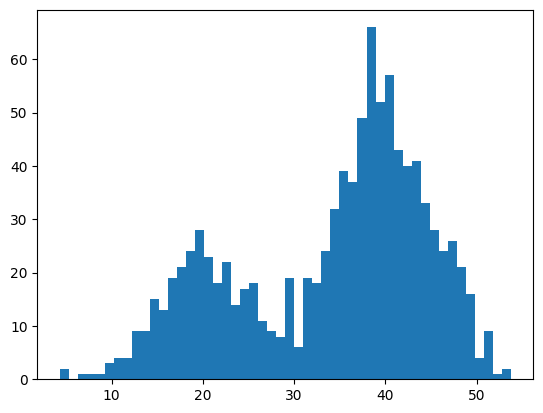

In [19]:
#KDE(Kernel Distribution Estimation)
#generate a sample
sample1 = normal(loc = 20 , scale = 5 , size = 300)
sample2 = normal(loc = 40 , scale = 5 , size = 700)
sample = np.hstack((sample1 , sample2))
#sample
#plot histogram bins = 50
plt.hist(sample, bins = 50)
#sample.min()

In [20]:
#KDE for the above distribution
from sklearn.neighbors import KernelDensity
model = KernelDensity(bandwidth=3 , kernel='gaussian')
sample = sample.reshape((len(sample) , 1))
model.fit(sample)


KernelDensity(bandwidth=3)

In [21]:
values = np.linspace(sample.min() , sample.max() , 100)
values = values.reshape((len(values) , 1))

In [22]:
probability_density = model.score_samples(values)
probability_density = np.exp(probability_density)
#score_samples(values) returns the log-density estimate of the input samples values. This is because the score_samples() method of the KernelDensity class returns the logarithm of the probability density estimate rather than the actual probability density estimate

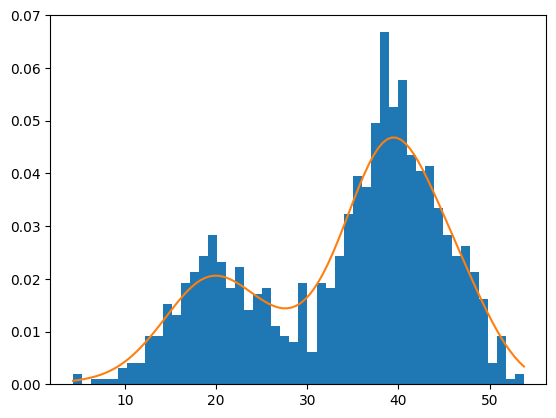

In [23]:
plt.hist(sample , bins = 50 , density = True)
plt.plot(values[:] , probability_density)
plt.show()

In [24]:
#Cumulatibe Distribution Function for PDF

In [25]:
import seaborn as sns
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_length', ylabel='Density'>

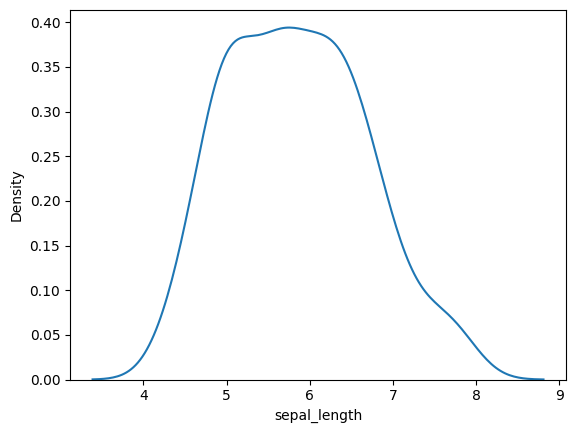

In [26]:
sns.kdeplot(df['sepal_length'])
            

<Axes: xlabel='sepal_length', ylabel='Density'>

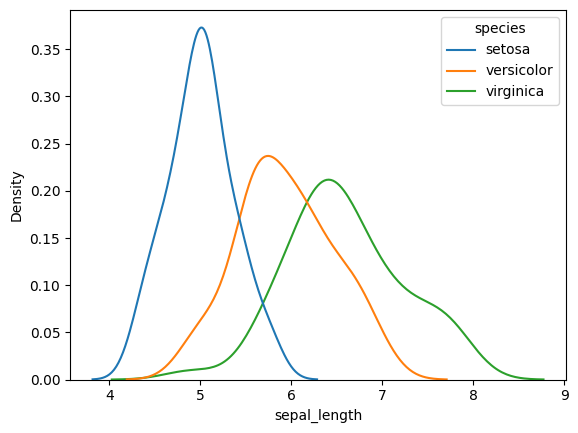

In [27]:
sns.kdeplot(data = df , x = 'sepal_length' , hue = 'species')

<Axes: xlabel='sepal_width', ylabel='Density'>

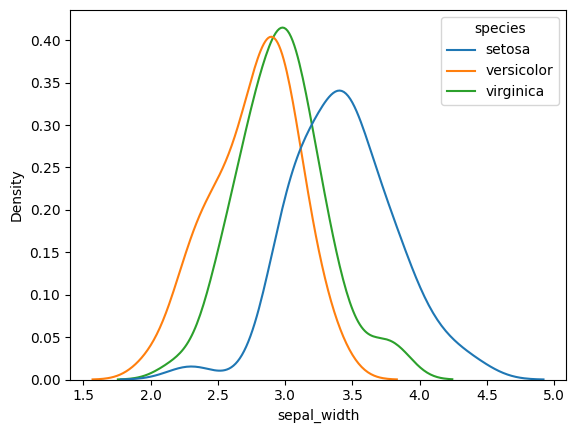

In [28]:
sns.kdeplot(data = df , x = 'sepal_width' , hue = 'species')

<Axes: xlabel='petal_length', ylabel='Density'>

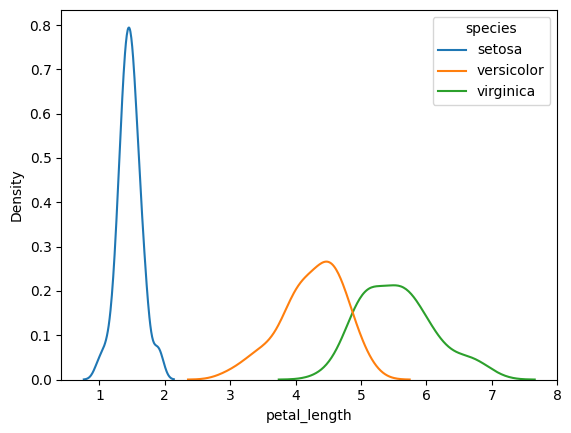

In [29]:
sns.kdeplot(data = df , x = 'petal_length' , hue = 'species')

<Axes: xlabel='petal_width', ylabel='Density'>

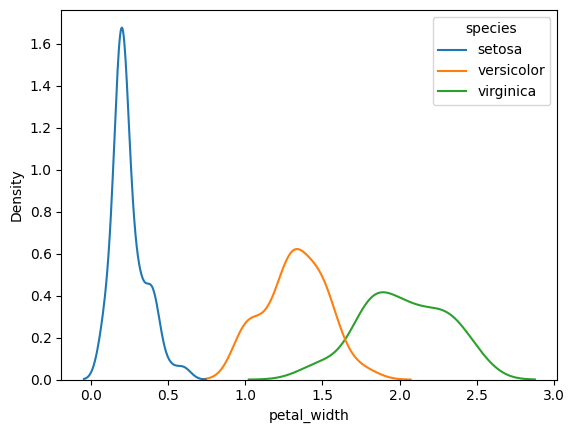

In [30]:
sns.kdeplot(data = df , x = 'petal_width' , hue = 'species')

In [31]:
import pandas as pd
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [32]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


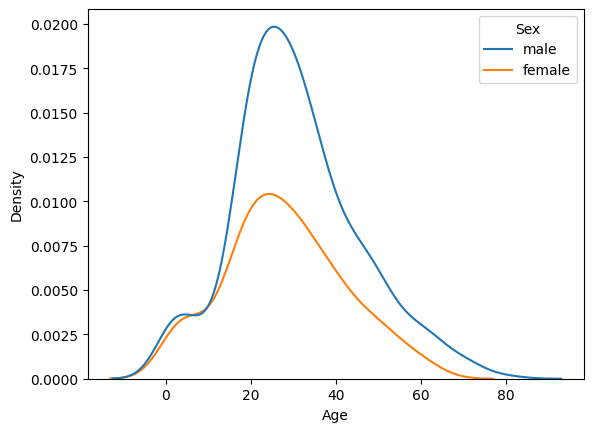

In [33]:
age_consideration = sns.kdeplot(data = titanic , x = 'Age', hue = 'Sex')

<Axes: xlabel='petal_width', ylabel='Density'>

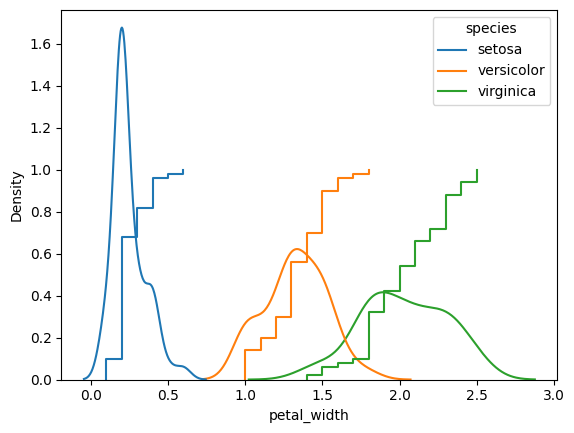

In [34]:
#how to use CDF 
import seaborn as sns
sns.kdeplot(data =df , x = 'petal_width' , hue = 'species')
sns.ecdfplot(data = df , x = 'petal_width' , hue = 'species')

In [35]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [36]:
titanic['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

<Axes: xlabel='Age', ylabel='Density'>

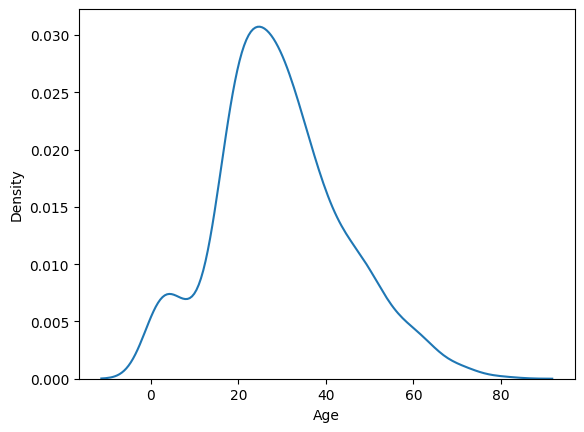

In [37]:
import seaborn as sns
sns.kdeplot(titanic['Age'])

In [38]:
titanic['Age'].mean()
titanic['Age'].std()

np.float64(14.526497332334042)

In [39]:
x = (titanic['Age'] - titanic['Age'].mean()) / titanic['Age'].std()

np.float64(2.338621049070358e-16)

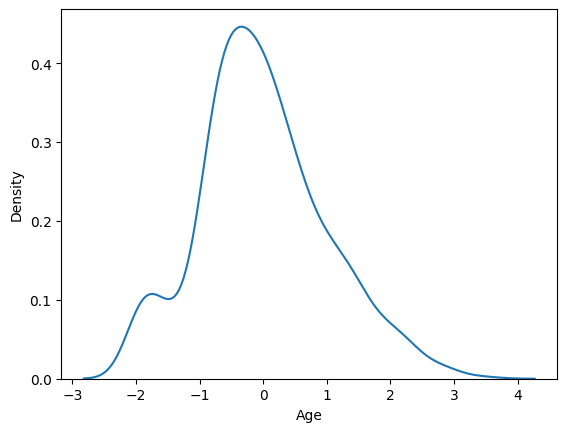

In [40]:
sns.kdeplot(x)
x.mean()
#x.std()

In [41]:
titanic['Age'].skew()

np.float64(0.38910778230082704)

In [42]:
max_allowed = titanic['Age'].mean() + 3*titanic['Age'].std()

In [43]:
min_allowed = titanic['Age'].mean() - 3*titanic['Age'].std()

In [44]:
titanic[(titanic['Age'] > max_allowed)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.775,NaN,S


In [45]:
import numpy as np
import pandas as pd
import seaborn as sns

In [46]:
df = sns.load_dataset("Iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_length', ylabel='Density'>

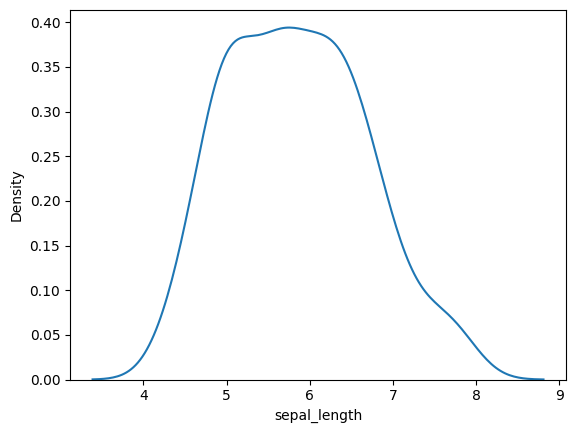

In [47]:
sns.kdeplot(df['sepal_length'])

In [48]:
temp = sorted(df['sepal_length'].tolist())

In [49]:
y_quant = []

for i in range(1 , 101) : 
    y_quant.append(np.percentile(temp , i))

In [50]:
samples = np.random.normal(loc = 0 , scale = 1 , size = 1000)

In [51]:
x_quant = []
for i in range(1 , 101) : 
    x_quant.append(np.percentile(samples , i))

<Axes: >

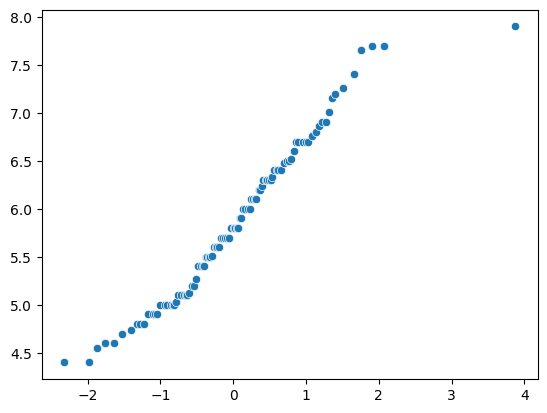

In [52]:
sns.scatterplot(x = x_quant , y = y_quant)

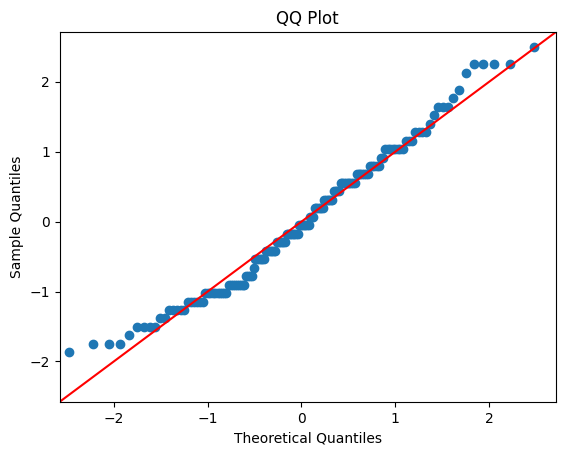

In [53]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Create a QQ plot of the data
fig = sm.qqplot(df['sepal_length'], line='45', fit=True)

# Add a title and labels to the plot
plt.title('QQ Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

# Show the plot
plt.show()


In [54]:
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

#Generate a set of random data
x = np.random.uniform(low = 0 , high = 1 , size = 1000)

(array([ 84.,  91., 115.,  92.,  87.,  95.,  97., 106., 108., 125.]),
 array([9.31044608e-04, 1.00725225e-01, 2.00519406e-01, 3.00313587e-01,
        4.00107768e-01, 4.99901948e-01, 5.99696129e-01, 6.99490310e-01,
        7.99284491e-01, 8.99078672e-01, 9.98872852e-01]),
 <BarContainer object of 10 artists>)

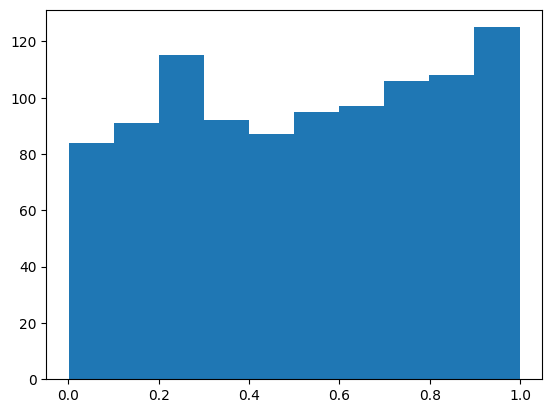

In [55]:
plt.hist(x)

In [56]:
params = stats.uniform.fit(x)
dist = stats.uniform(loc = params[0] , scale = params[1])

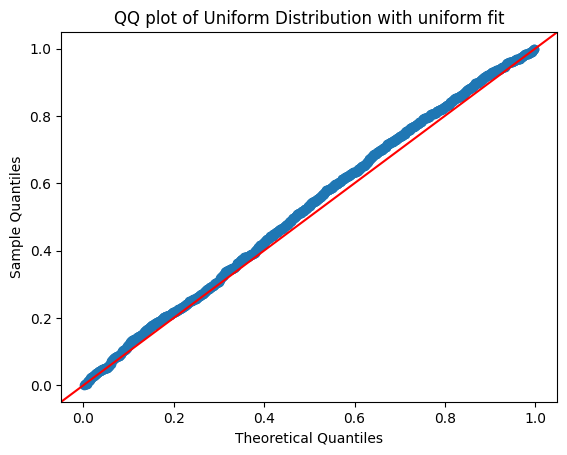

In [57]:
#create a QQ plot of the data using the uniform distribution
fig = sm.qqplot(x , dist = dist , line = '45')

#Add a title and labels to the plot
plt.title('QQ plot of Uniform Distribution with uniform fit')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

#show the plot
plt.show()

In [58]:
    import numpy as np



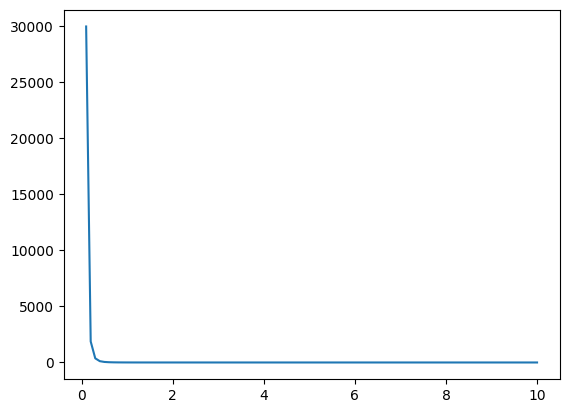

In [59]:
import matplotlib.pyplot as plt

#Define the parameters of the pareto distribution
alpha = 3
xm = 1

#create an array of x values
x = np.linspace(0.1 , 10 , 100)

#Calculate the y values of the pareto distribution
y = alpha * (xm **alpha) / (x**(alpha + 1))

plt.plot(x , y)

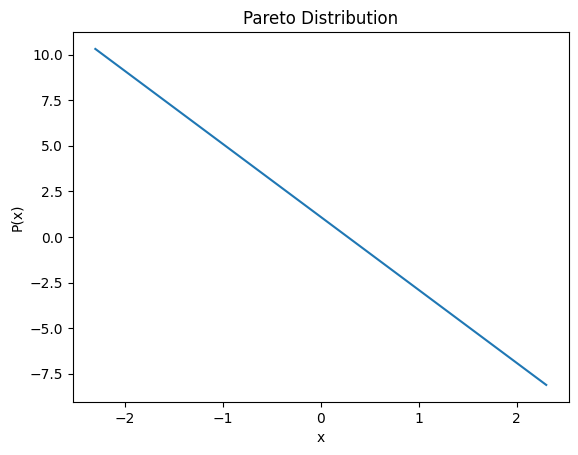

In [60]:
#create the log log plot
plt.plot(np.log(x) , np.log(y))

#add labels and a title
plt.xlabel('x')
plt.ylabel('P(x)')
plt.title('Pareto Distribution')

#show the plot
plt.show()

In [61]:
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

#Define the parameters of the pareto distribution
alpha = 2
xm = 1

#Generate a set of random data from the pareto distribution
x = stats.pareto.rvs(b = alpha , scale = xm , size = 1000)

(array([965.,  22.,   9.,   0.,   2.,   0.,   1.,   0.,   0.,   1.]),
 array([ 1.0006388 ,  5.50101608, 10.00139336, 14.50177065, 19.00214793,
        23.50252521, 28.00290249, 32.50327977, 37.00365706, 41.50403434,
        46.00441162]),
 <BarContainer object of 10 artists>)

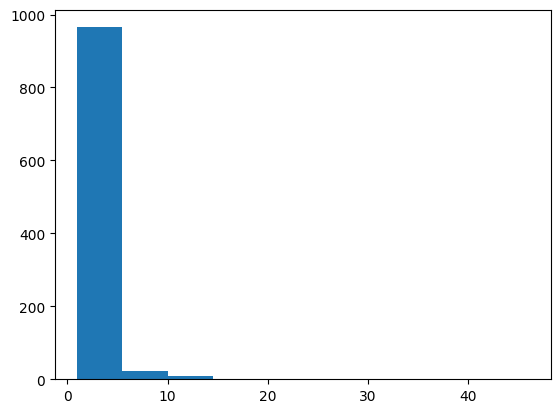

In [62]:
plt.hist(x)

In [63]:
#fit a pareto distribution of the data
params = stats.pareto.fit(x , floc = 0)

#Create  a pareto distribution object with the fitted parameter
dist = stats.pareto(b = params[0] , scale = params[2])

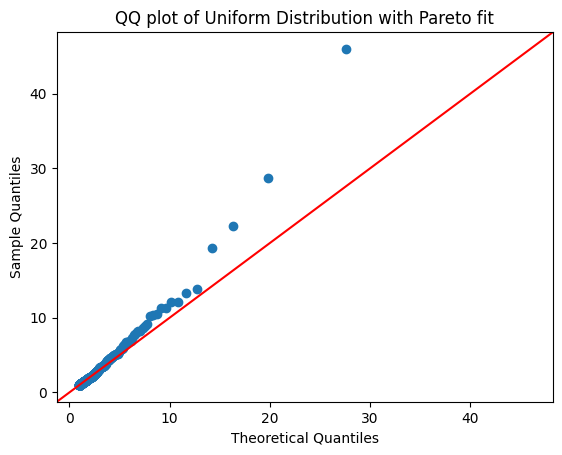

In [64]:
#create a aQQ plot of the data using the pareto distribution

fig = sm.qqplot(x , dist = dist , line = '45')

#Add a title and labels to the plot
plt.title('QQ plot of Uniform Distribution with Pareto fit')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

#show the plot
plt.show()


In [65]:
import pandas as pd
import numpy as np


import scipy.stats as stats
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [66]:
df = pd.read_csv('titanic.csv' , usecols = ['Age' , 'Fare' , 'Survived'])

In [67]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [68]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [69]:
df['Age'].fillna(df['Age'].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [70]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]

In [71]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 ,random_state = 42) 

C:\Users\User MNT\AppData\Local\Temp\ipykernel_3360\3568154927.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


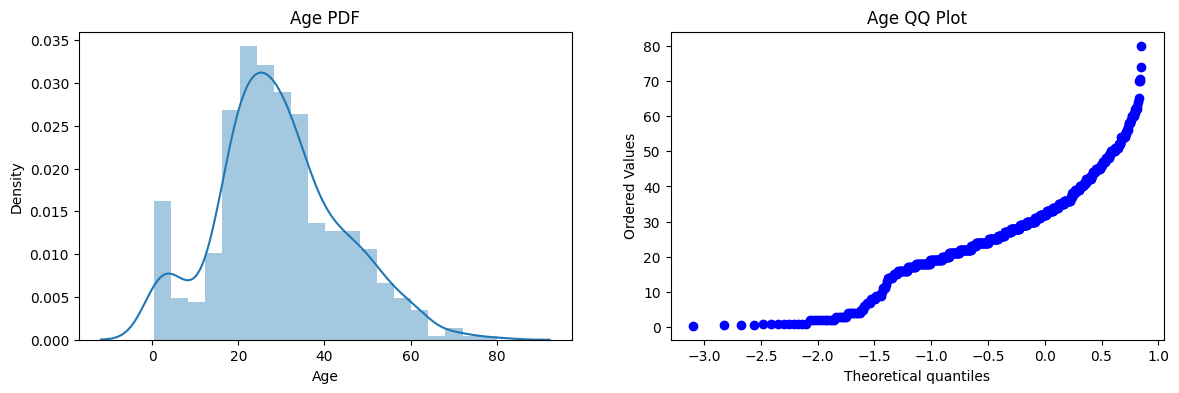

In [72]:
plt.figure(figsize = (14 , 4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'] , dist = "norm" , plot = plt)
plt.title('Age QQ Plot')

plt.show()

In [73]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [74]:
clf.fit(X_train , y_train)
clf2.fit(X_train , y_train)

y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)

print("Accuracy LR" , accuracy_score(y_test , y_pred))
print("Accuracy DT" , accuracy_score(y_test , y_pred1))

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [76]:
trf = FunctionTransformer(func = np.log1p)

In [77]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [78]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed , y_train)
clf2.fit(X_train_transformed , y_train)

y_pred = clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)

print("Accuracy LR" , accuracy_score(y_test , y_pred))
print("Accuracy DT" , accuracy_score(y_test , y_pred1))

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR" , np.mean(cross_val_score(clf , X_transformed , y , scoring = 'accuracy' , cv = 10)))
print("DT" , np.mean(cross_val_score(clf2 , X_transformed , y , scoring = 'accuracy' , cv = 10)))

In [ ]:
plt.figure(figsize = (14 , 4))

plt.subplot(121)
stats.probplot(X_train['Fare'] , dist = "norm" , plot = plt)
plt.title('Fare before log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'] , dist = "norm" , plot = plt)
plt.title('Fare after Log')

plt.show()

In [ ]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm",plot=plt)
plt.title('Age before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'] , dist = "norm" , plot = plt)
plt.title('Age after Log')

plt.show()

In [ ]:
def apply_transform(transform) : 
    X = df.iloc[:,1:3]
    y = df.iloc[: , 0]
    trf = ColumnTransformer([('log', FunctionTransformer(transform) , ['Fare'])] , remainder = 'passthrough')
    X_trans = trf.fit_transform(X)
    clf = LogisticRegression()
    print("Accuracy" , np.mean(cross_val_score(clf . X_trans , y , scoring = 'accuracy' , cv = 10)))
    plt.figure(figsize = (14 , 4))
    plt.subplot(121)
    stats.probplot(X['Fare'] , dist = "norm" , plot = plt)
    plt.title('Fare Before Transform')
    plt.subplot(122)
    stats.probplot(X_trans[: , 0] , dist = "norm" , plot = plt)
    plt.title('Fare after Transform')
    plt.show()



In [75]:
apply_transform(lambda x : x)

AttributeError: 'LogisticRegression' object has no attribute 'X_trans'

In [79]:
#Box-Cox and Yeo-Johnson Transformation
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer

In [82]:
df = pd.read_csv("concrete.csv")


In [83]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [84]:
df.shape


(1030, 9)

In [86]:
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [87]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [88]:
X = df.drop(columns = ['strength'])
y = df.iloc[: , -1]

In [89]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

In [90]:
#Apply Regression without any transformation
lr = LinearRegression()
lr.fit(X_train , y_train)
y_pred = lr.predict(X_test)
r2_score(y_test , y_pred)

0.6275531792314848